In [6]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [1]:
!pip install -U pip wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install ensemble-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 129.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nv

In [3]:
from ensemble_transformers import EnsembleModelForSequenceClassification
import pandas as pd
from sklearn.metrics import accuracy_score
import torch
from tqdm import tqdm

In [4]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [5]:
from math import trunc

models_to_use = ["no0ne-97/misoginia-bert-spanish-wwm-cased-V3", "no0ne-97/misoginia-roberta-base-bne-V3", "no0ne-97/misoginia-beto-sentiment-analysis-V3"]
ensemble = EnsembleModelForSequenceClassification.from_multiple_pretrained(*models_to_use)
ensemble.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.66M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/840 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/730k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/78.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [8]:
df_test = pd.read_csv('/content/drive/MyDrive/MiSongGiny/data/Task1/subtask1_train_rev002.csv', encoding='utf-8')
df_test = df_test.dropna(subset=['lyrics'])
df_test['label'] = df_test['label'].map({'NM': 0, 'M': 1})
df_test['label'].value_counts()

,count
label,
0,1462
1,642


In [9]:
df_test.head()

,id,lyrics,label
0,T1_TRAIN_0001,"\n[Letra de ""No Me Enseñaste""]\n\n[Verso 1]\nL...",0
1,T1_TRAIN_0002,"\nPachin!\n\nViajera, te vas de puerta en puer...",1
2,T1_TRAIN_0003,"n\nTe amare toda la vida\nTodos los años, los ...",0
3,T1_TRAIN_0004,"[Letra de ""Mi lado Oscuro"" ft. Hijo Pródigo]\n...",1
4,T1_TRAIN_0005,"ba-baby\nMuah, jajaja\n[Letra de ""Me Enamore D...",1


In [10]:
for model in ensemble.models:
    print(model.config.num_labels)  # debe ser 2

2
2
3


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for index, row, in tqdm(df_test.iterrows()):
    lyrics = row["lyrics"]
    true_label = row["label"]


    if len(lyrics) > 1000:
        lyrics = lyrics[:1000]


    output = ensemble(lyrics)
    probs = [F.softmax(logit, dim=1) for logit in output.logits if logit.shape[-1] == 2]

    if len(probs) == 0:
        raise ValueError("No hay modelos con logits de 2 clases.")

    # Paso 3: promedio de probabilidades
    avg_probs = torch.stack(probs).mean(dim=0)

    # Paso 4: predicción final
    pred_class = torch.argmax(avg_probs, dim=1).item()

    # Guardar etiquetas
    y_true.append(true_label)
    y_pred.append(pred_class)

2104it [03:04, 11.40it/s]


Reporte de clasificación (votación mayoritaria):
              precision    recall  f1-score   support

 No Misógina       0.92      0.96      0.94      1462
    Misógina       0.90      0.81      0.85       642

    accuracy                           0.92      2104
   macro avg       0.91      0.89      0.90      2104
weighted avg       0.91      0.92      0.91      2104



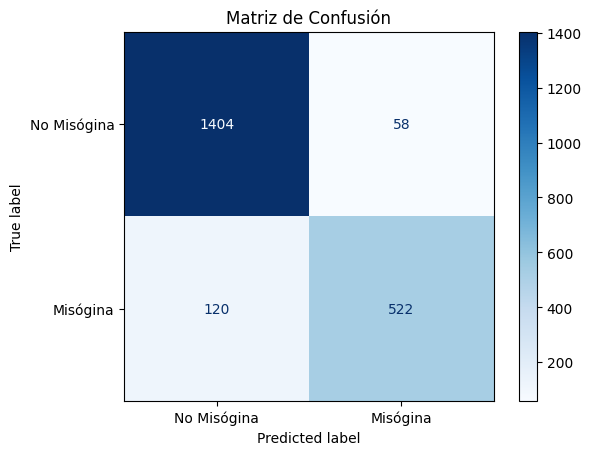

In [12]:
# === Evaluación final ===
print("Reporte de clasificación (votación mayoritaria):")
print(classification_report(y_true, y_pred, target_names=["No Misógina", "Misógina"]))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Misógina", "Misógina"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

#Final classification

In [14]:
import pandas as pd

new_df = pd.DataFrame(columns=['id', 'label'])


In [15]:
df= pd.read_csv('/content/drive/MyDrive/MiSongGiny/data/test_data/track_1_public_test_rev002.csv', encoding='utf-8')

In [16]:
df.head()

,id,lyrics
0,T1_TEST_0001,"\n[Letra de ""Felicidad (De La Serie 'Berlín' D..."
1,T1_TEST_0002,s\nGrabé en la penca de un maguey tu nombre\nU...
2,T1_TEST_0003,\nSoy un hombre inocente todavia\nNecesito una...
3,T1_TEST_0004,"\n[Intro: Voz femenina]\nAtentado en El Cairo,..."
4,T1_TEST_0005,"s\n[Letra de ""En Tu Perra Vida""]\n\n[Verso]\nD..."


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for index, row, in tqdm(df.iterrows()):
    id = row["id"]
    lyrics = row["lyrics"]

    if len(lyrics) > 1000:
        lyrics = lyrics[:1000]


    output = ensemble(lyrics)
    probs = [F.softmax(logit, dim=1) for logit in output.logits if logit.shape[-1] == 2]

    if len(probs) == 0:
        raise ValueError("No hay modelos con logits de 2 clases.")

    # Paso 3: promedio de probabilidades
    avg_probs = torch.stack(probs).mean(dim=0)

    # Paso 4: predicción final
    pred_class = torch.argmax(avg_probs, dim=1).item()

    df_new_row = pd.DataFrame({'id': [id], 'label': [pred_class]})
    df_new_row['label'] = df_new_row['label'].map({0: 'NM', 1: 'M'})
    new_df = pd.concat([new_df, df_new_row], ignore_index=True)




527it [00:30, 17.33it/s]


In [19]:
new_df.head()

,id,label
0,T1_TEST_0001,NM
1,T1_TEST_0002,NM
2,T1_TEST_0003,M
3,T1_TEST_0004,NM
4,T1_TEST_0005,NM


In [20]:
new_df.to_csv('/content/drive/MyDrive/MiSongGiny/answers/track_1_predictions.csv', index=False)